In [11]:
library(dplyr)
library(ggplot2)
library(tidyr)

In [12]:
# Load the CSV file into R (assuming the file is in your working directory)
data <- read.csv("ds_joblistings.csv")

In [13]:
# Filter the data to include only D3 and Tableau skills
data_filtered <- data %>%
  filter(Keyword %in% c("D3", "Tableau"))

In [14]:
# Transform the dataset into long format for visualization
data_long <- data_filtered %>%
  select(Keyword, LinkedIn.., Indeed.., SimplyHired.., Monster..) %>%
  gather(Platform, Percentage, LinkedIn..:Monster..)

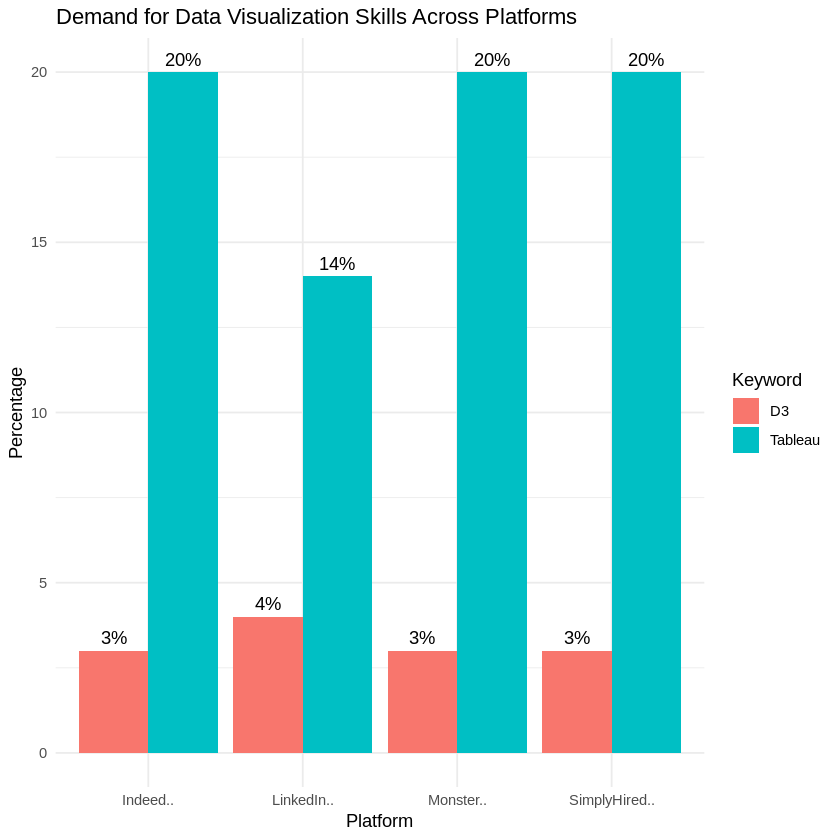

In [17]:
ggplot(data_long, aes(x = Platform, y = Percentage, fill = Keyword)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = paste0(Percentage,"%")),
            position = position_dodge(width = 0.9),
            vjust = -0.5) +  # Adjust the label position
  labs(title = "Demand for Data Visualization Skills Across Platforms",
       x = "Platform", y = "Percentage") +
  theme_minimal()

In [18]:
# Add a new column 'Subcategory' to categorize each skill
data$Subcategory <- ifelse(data$Keyword %in% c("Python", "R", "Java", "C++", "C"), "Programming Languages",
                    ifelse(data$Keyword %in% c("Hadoop", "Spark", "Hive", "Pig", "Hbase"), "Big Data Technologies",
                    ifelse(data$Keyword %in% c("SQL", "NoSQL", "MySQL", "MongoDB", "Cassandra"), "Data Management & Databases",
                    ifelse(data$Keyword %in% c("Tableau", "D3", "Matlab"), "Data Visualization",
                    ifelse(data$Keyword %in% c("TensorFlow", "Keras", "PyTorch", "Scikit-learn", "Pandas", "Numpy"), "Machine Learning & Deep Learning",
                    ifelse(data$Keyword %in% c("AWS", "Azure", "Docker", "Git"), "Cloud & DevOps Tools",
                    ifelse(data$Keyword %in% c("SAS", "SPSS"), "Statistical Analysis & Tools",
                    "Other")))))))

In [19]:
# Summing job listings for each platform across subcategories
data_summary <- data %>%
  group_by(Subcategory) %>%
  summarise(Total_Listings = sum(LinkedIn + Indeed + SimplyHired + Monster)) %>%
  arrange(desc(Total_Listings))

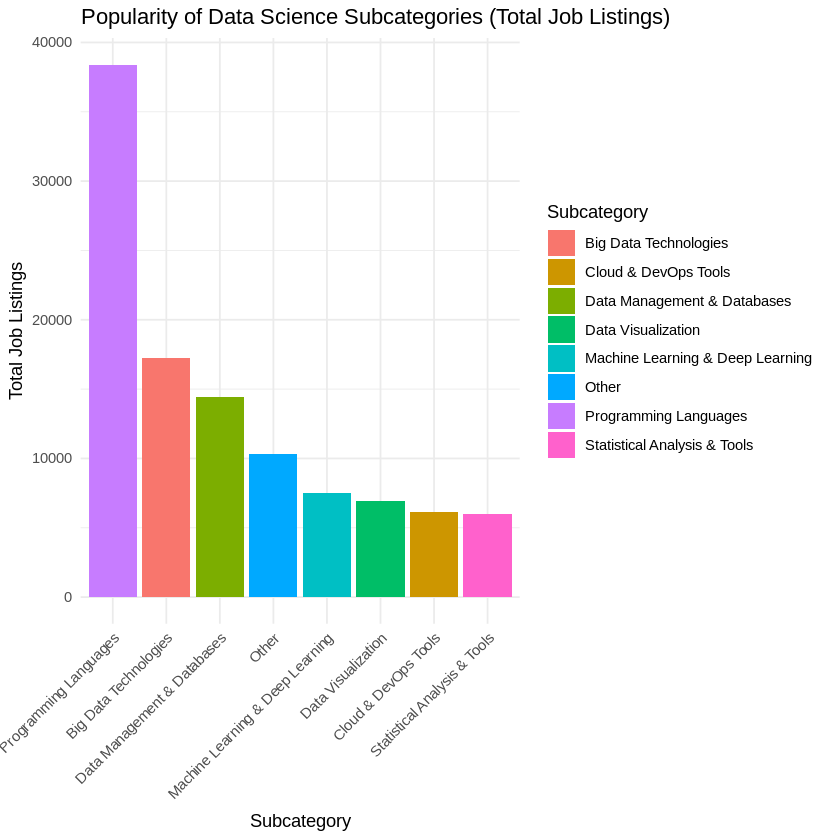

In [20]:
# Create the bar plot for subcategories and their popularity
ggplot(data_summary, aes(x = reorder(Subcategory, -Total_Listings), y = Total_Listings, fill = Subcategory)) +
  geom_bar(stat = "identity") +
  labs(title = "Popularity of Data Science Subcategories (Total Job Listings)",
       x = "Subcategory", y = "Total Job Listings") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))